# Titanic
***

## Importing Libraries

In [1]:
#import the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [2]:
import os
os.getcwd()
os.chdir('/Users/mahdieh/Desktop/internship/kaggle/titanic')
os.getcwd()

'/Users/mahdieh/Desktop/internship/kaggle/titanic'

## Load Dataset

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
train_shape = train_data.shape
test_shape = test_data.shape
print("Train Data Shape:", train_shape)
print("Test Data Shape:", test_shape)

Train Data Shape: (891, 12)
Test Data Shape: (418, 11)


## Info of Dataset

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
#number of null values in each column
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#number of null values in each column
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
#train data column names
print(train_data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [12]:
#Categorical columns
train_data.describe(include = ['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [13]:
#Numerical columns
train_data.describe(include = ['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
#Categorical columns
test_data.describe(include = ['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [15]:
#Numerical columns
test_data.describe(include = ['number'])

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Fill or Delete the Missing Values

In [16]:
train = train_data.copy(deep = True)
test = test_data.copy(deep = True)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
dataset = [train, test]

In [18]:
for data in dataset:
    
    data['Age'].fillna(data['Age'].median(), inplace = True)
    
    data['Fare'].fillna(data['Fare'].median(), inplace = True)
    
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

print(train.isnull().sum())
print("-"*20)
print(test.isnull().sum())
    

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
--------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [19]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S


In [21]:
train.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], axis= 1, inplace= True)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [22]:
test.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], axis= 1, inplace= True)
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,27.0,0,0,8.0500,S


In [23]:
print(train.isnull().sum())
print("-"*20)
print(test.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
--------------------
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


## Visulization

<AxesSubplot:xlabel='Survived', ylabel='count'>

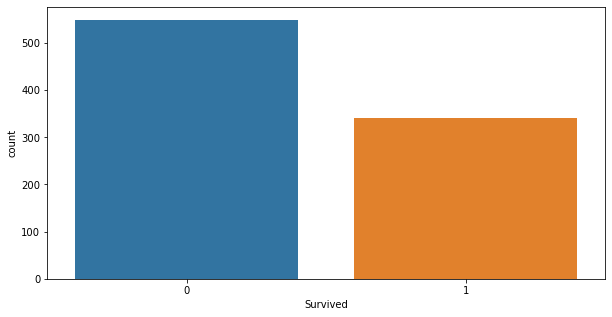

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Survived', data = train)

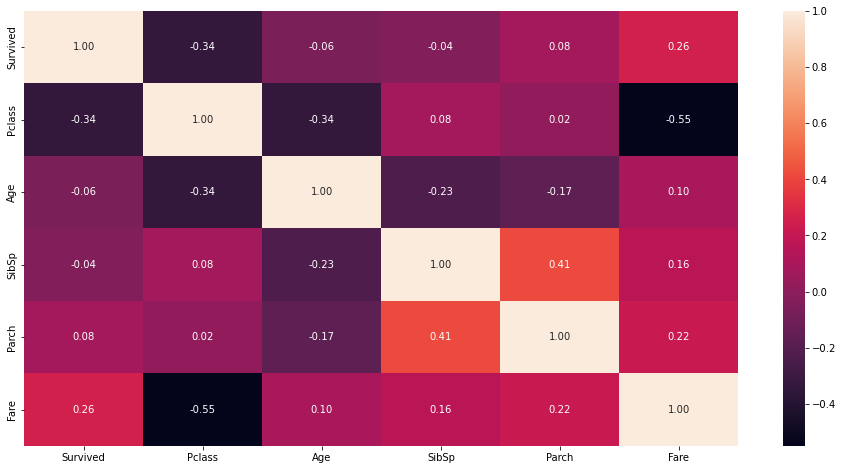

In [25]:
plt.figure(figsize= (16, 8))
sns.heatmap(train.corr(), annot = True, fmt= '.2f');

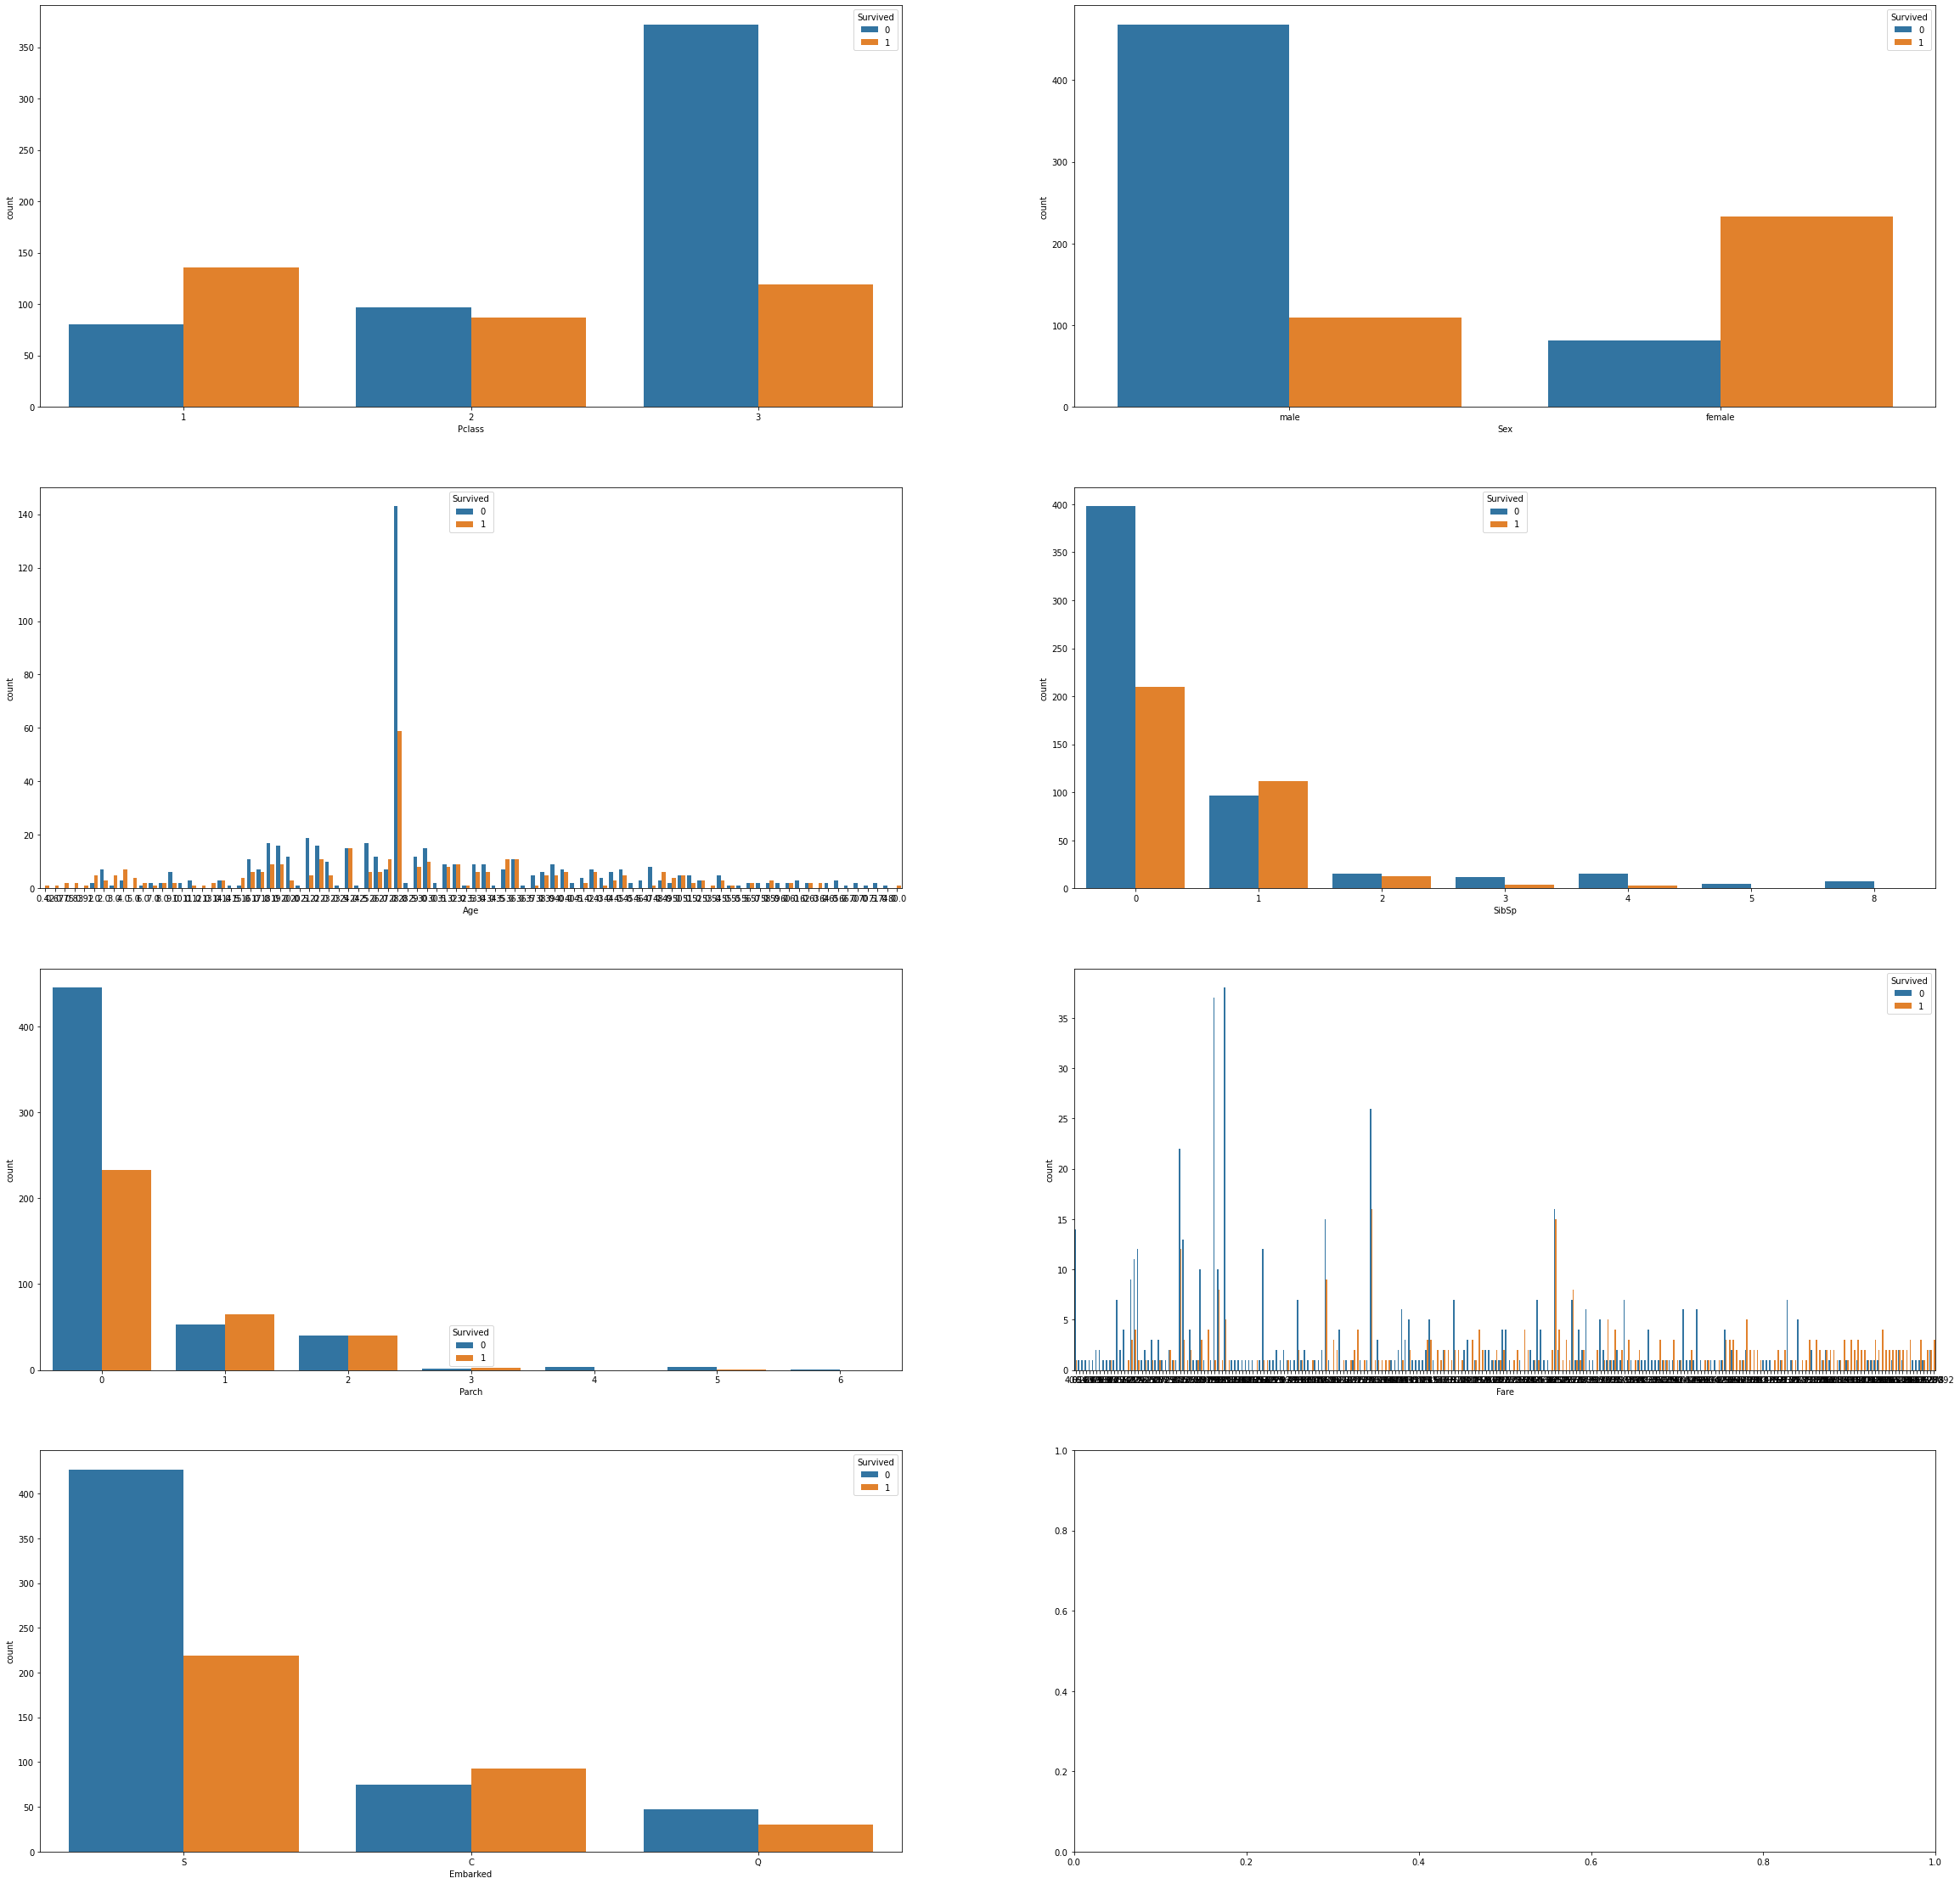

In [26]:
fig, ax = plt.subplots(4 , 2,figsize=(40,40))
for i in range(1 , len(train.columns)):
    x = i - 1;
    sns.countplot(x = train.columns[i], data = train, hue = 'Survived', ax=ax[(int)(x / 2)][(int)(x % 2)]);

<AxesSubplot:xlabel='Age', ylabel='Density'>

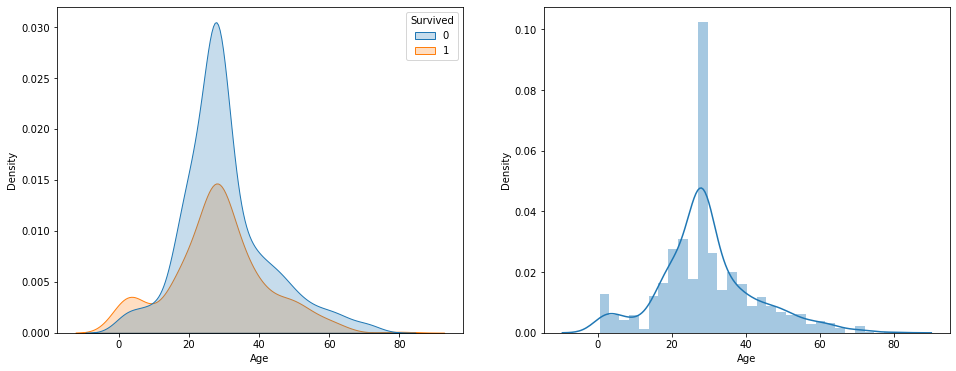

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (16,6))
sns.kdeplot(x = 'Age', data = train, hue= 'Survived', shade = True, ax = ax[0])
sns.distplot(train.Age, ax = ax[1])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

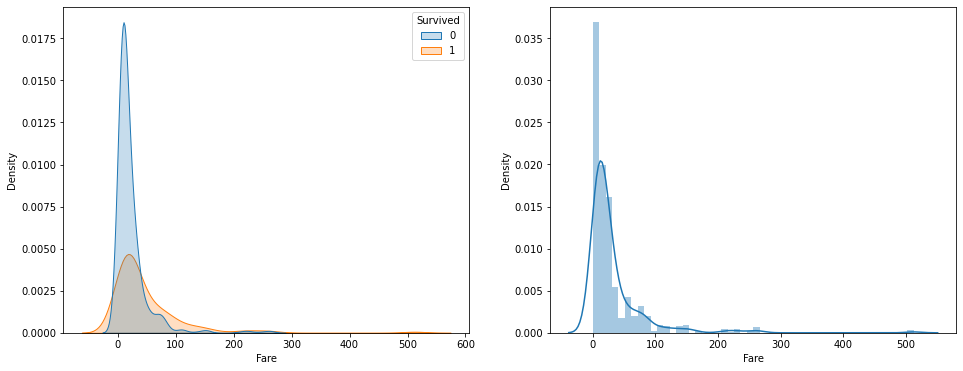

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (16,6))
sns.kdeplot(x = 'Fare', data = train, hue= 'Survived', shade = True, ax = ax[0])
sns.distplot(train.Fare, ax = ax[1])

## Change Dataset 

### Convert the categorical variables into numerical form

In [29]:
dataset = [train, test]

In [30]:
encoder = LabelEncoder()
for data in dataset:
    for i in range(len(data.columns)):

        c = data.columns[i]
        if(data.dtypes[c] == 'object'):

            data[c] = encoder.fit_transform(data[c])

In [31]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [32]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,27.0,0,0,8.0500,2


## Split Data to X, y

In [33]:
#feature variable
X = train.iloc[:, 1:]
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [34]:
#Target variable
y = train['Survived']
y[y == 0] = -1

In [35]:
print('X shape', X.shape)
print('y shape', y.shape)

X shape (891, 7)
y shape (891,)


In [36]:
#y - has the client subscribed a term deposit? 0:no 1:yes
y.value_counts()

-1    549
 1    342
Name: Survived, dtype: int64

## Split Data to Train and Test

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [38]:
print('X train shape', X_train.shape)
print('y train shape', y_train.shape)

X train shape (623, 7)
y train shape (623,)


In [39]:
print('X test shape', X_test.shape)
print('y test shape', y_test.shape)

X test shape (268, 7)
y test shape (268,)


## Scaling

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
X_train

array([[-1.63788124,  0.72077194, -1.91971935, ...,  1.99885349,
         0.98099823,  0.57000481],
       [ 0.80326712,  0.72077194, -0.0772525 , ..., -0.47932706,
        -0.46963364,  0.57000481],
       [ 0.80326712, -1.38740139, -2.15002771, ...,  0.75976322,
        -0.40613632,  0.57000481],
       ...,
       [ 0.80326712,  0.72077194,  0.92075038, ..., -0.47932706,
        -0.34778742,  0.57000481],
       [-1.63788124, -1.38740139, -1.15202483, ...,  1.99885349,
         1.72907416,  0.57000481],
       [-1.63788124,  0.72077194, -0.61463866, ...,  0.75976322,
         0.8913508 ,  0.57000481]])

In [42]:
X_test

array([[ 0.80326712,  0.72077194, -0.0772525 , ...,  0.75976322,
        -0.32547755, -2.01263516],
       [-0.41730706,  0.72077194,  0.15305586, ..., -0.47932706,
        -0.41855727,  0.57000481],
       [ 0.80326712,  0.72077194, -0.69140812, ..., -0.47932706,
        -0.46906094,  0.57000481],
       ...,
       [-1.63788124,  0.72077194,  2.76321724, ..., -0.47932706,
        -0.10376746,  0.57000481],
       [ 0.80326712,  0.72077194, -0.92171647, ..., -0.47932706,
        -0.45459629,  0.57000481],
       [-1.63788124,  0.72077194, -0.0772525 , ..., -0.47932706,
        -0.10376746,  0.57000481]])

## Model Building (Classification)

### <font color = 'red'>LR, KNN, DT, NB, RF: </font>

In [43]:
models={
        'LogisticRegression':LogisticRegression(),
        'KNeighborsClassifier':KNeighborsClassifier(),
        'DecisionTreeClassifier':DecisionTreeClassifier(),
        'GaussianNB':GaussianNB(),
        'RandomForestClassifier':RandomForestClassifier()
        }

In [44]:
scores = {}

In [45]:
for i, model in models.items():

    print("model: ", model)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test , y_pred))
    print("-" * 50)
    scores[i] = model.score(X_test,y_test)
    

model:  LogisticRegression()
              precision    recall  f1-score   support

          -1       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

--------------------------------------------------
model:  KNeighborsClassifier()
              precision    recall  f1-score   support

          -1       0.78      0.88      0.83       157
           1       0.79      0.66      0.72       111

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.79      0.78       268

--------------------------------------------------
model:  DecisionTreeClassifier()
              precision    recall  f1-score   support

          -1       0.80      0.80      0.80       157
           1       0.71      0.72      0.7

### <font color = 'blue'>SVM: </font>

In [46]:
from sklearn.svm import SVC

In [47]:
kernels = {'SVC_linear':'linear','SVC_poly':'poly','SVC_rbf':'rbf','SVC_sigmoid':'sigmoid'}

In [48]:
svc = {}

In [49]:
def SVM_fit_score(kernels,  X_train, X_test, y_train, y_test):

    for i, kernel in kernels.items():
        
        print('kernel: ', kernel)
        
        svc[i] = SVC(kernel=kernel).fit(X_train, y_train)
        y_pred = svc[i].predict(X_test)
        
        print(classification_report(y_test , y_pred))
        print('-'*60)
        scores[i] = svc[i].score(X_test,y_test)


In [50]:
SVM_fit_score(kernels, X_train, X_test, y_train, y_test)

kernel:  linear
              precision    recall  f1-score   support

          -1       0.80      0.85      0.83       157
           1       0.77      0.70      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

------------------------------------------------------------
kernel:  poly
              precision    recall  f1-score   support

          -1       0.79      0.87      0.83       157
           1       0.79      0.68      0.73       111

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268

------------------------------------------------------------
kernel:  rbf
              precision    recall  f1-score   support

          -1       0.80      0.93      0.86       157
           1       0.87      0.67      0.76       111

    accuracy     

In [51]:
#Accuracy = TP+TN/TP+FP+FN+TN
#Precision = TP/TP+FP
#Recall = TP/TP+FN
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [52]:
def SVM_Kfold(kernels,  X_train, X_test, y_train, y_test):
    
    mean_std = {}
    for i, kernel in kernels.items():
        kfold = KFold(n_splits=5, shuffle=True, random_state=1111)
        cv_results = cross_val_score(svc[i], X_train, y_train, cv = kfold, scoring='accuracy')
        mean_std[i] = (cv_results.mean(), cv_results.std())
    mean_std = pd.DataFrame(mean_std, index=['mean' , 'std']).transpose()
    
    return mean_std

In [53]:
cv_result = SVM_Kfold(kernels, X_train, X_test, y_train, y_test)

In [54]:
cv_result

,mean,std
SVC_linear,0.784865,0.021014
SVC_poly,0.810568,0.023177
SVC_rbf,0.821781,0.029991
SVC_sigmoid,0.696645,0.022191


## Test Prediction

In [55]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,27.0,0,0,8.0500,2


In [56]:
test = scaler.fit_transform(test)
test

array([[ 0.87348191,  0.75592895,  0.38623105, ..., -0.4002477 ,
        -0.49741333, -0.47091535],
       [ 0.87348191, -1.32287566,  1.37137004, ..., -0.4002477 ,
        -0.51227801,  0.70076689],
       [-0.31581919,  0.75592895,  2.55353683, ..., -0.4002477 ,
        -0.46410047, -0.47091535],
       ...,
       [ 0.87348191,  0.75592895,  0.70147553, ..., -0.4002477 ,
        -0.50779638,  0.70076689],
       [ 0.87348191,  0.75592895, -0.20485235, ..., -0.4002477 ,
        -0.49345515,  0.70076689],
       [ 0.87348191,  0.75592895, -0.20485235, ...,  0.61989583,
        -0.23695704, -1.64259759]])

In [57]:
test_pred = svc['SVC_rbf'].predict(test)

In [58]:
submission = pd.DataFrame(test_data['PassengerId'])
submission

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [59]:
submission['Survived'] = test_pred
submission.replace(-1 , 0, inplace=True)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [60]:
submission['Survived'].value_counts()

0    289
1    129
Name: Survived, dtype: int64

In [61]:
submission.to_csv('submission.csv', index = False)

In [62]:
scores = pd.DataFrame(scores, index=['Score']).transpose()

In [63]:
scores.sort_values(by = ['Score'], ascending = False, inplace = True)

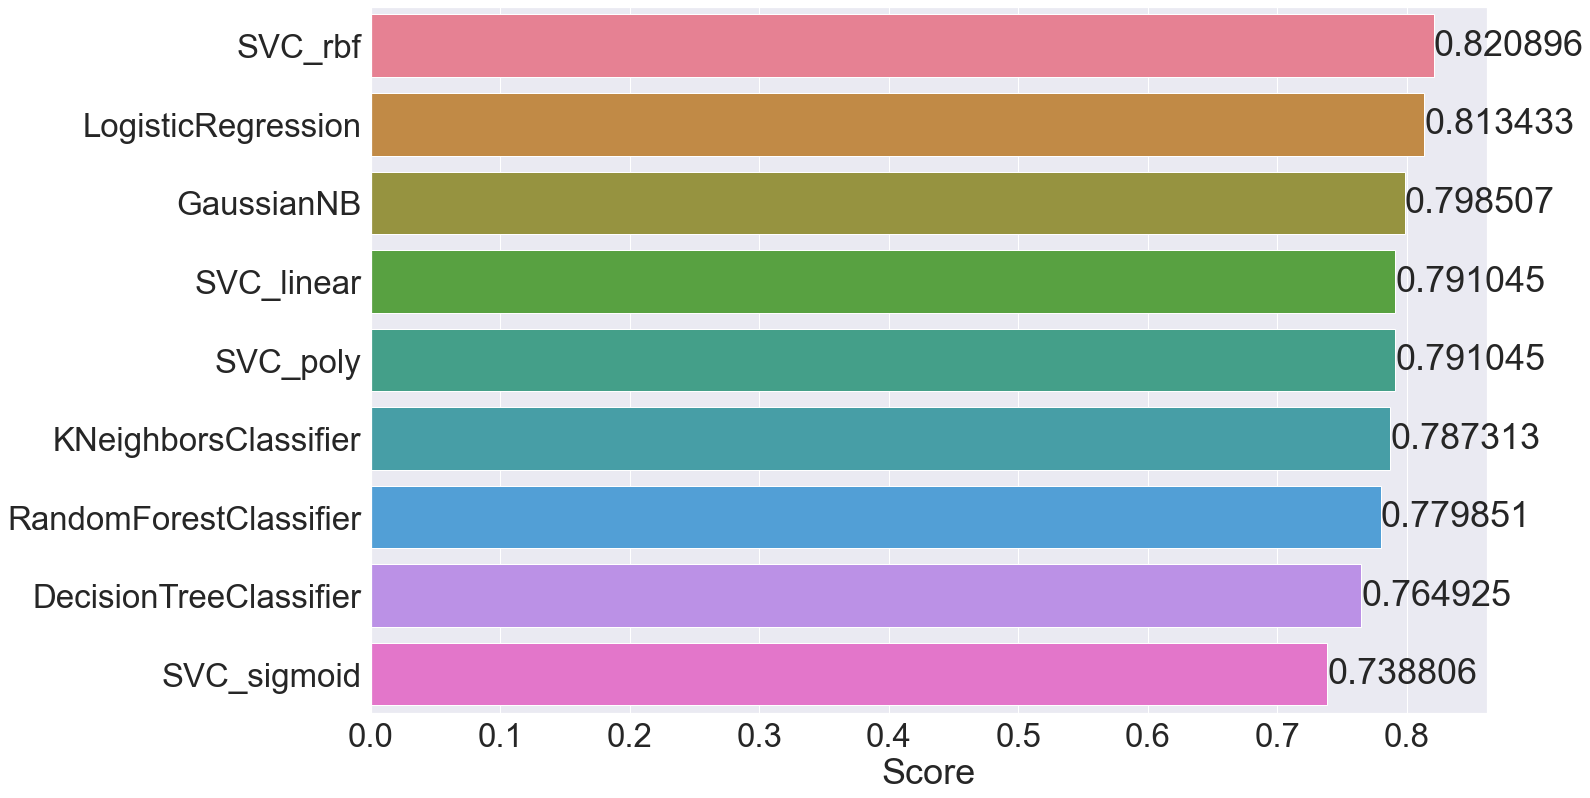

In [69]:
plt.figure(figsize = (20,13))
sns.set(font_scale = 3)
s = sns.barplot(x=scores.Score, y = scores.index, data = scores, palette="husl")
s.bar_label(s.containers[0]);

In [65]:
scores

,Score
SVC_rbf,0.820896
LogisticRegression,0.813433
GaussianNB,0.798507
SVC_linear,0.791045
SVC_poly,0.791045
KNeighborsClassifier,0.787313
RandomForestClassifier,0.779851
DecisionTreeClassifier,0.764925
SVC_sigmoid,0.738806


## ORSVM

In [66]:
#import orsvm

In [67]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

#X_train = X_train.to_numpy()
#X_test = X_test.to_numpy()
#y_test = y_test.to_numpy()
#y_train = y_train.to_numpy()

In [68]:
model = orsvm.Model(kernel="Chebyshev",order=6,T=0.15,form='r', c = 3000)

NameError: name 'orsvm' is not defined

In [ ]:
Weights, SupportVectors, Bias, KernelInstance = model.ModelFit(X_train,y_train)

In [ ]:
scores['*ORSVM_Chebyshev*'] = model.ModelPredict(X_test, y_test, Bias, KernelInstance)

In [ ]:
model2 = orsvm.Model(kernel="Legendre",order=5,T=0.15, c = 3000)
Weights, SupportVectors, Bias, KernelInstance = model2.ModelFit(X_train,y_train)

In [ ]:
scores['*ORSVM_Legendre*'] = model2.ModelPredict(X_test, y_test, Bias, KernelInstance)

In [ ]:
model3 = orsvm.Model(kernel="Gegenbauer",order=6,param1=0.5,T=0.15, c = 20000)
Weights, SupportVectors, Bias, KernelInstance = model3.ModelFit(X_train,y_train)

In [ ]:
scores['*ORSVM_Gegenbauer*'] = model3.ModelPredict(X_test, y_test, Bias, KernelInstance)

In [ ]:
model4 = orsvm.Model(kernel="Jacobi",order=6,param1=-0.8,param2=0.2,T=0.15,noise=0.1, c = 30000)
Weights, SupportVectors, Bias, KernelInstance = model4.ModelFit(X_train,y_train)

In [ ]:
scores['*ORSVM_Jacobi*'] = model4.ModelPredict(X_test, y_test, Bias, KernelInstance)

In [ ]:
scores = pd.DataFrame(scores, index=['Score']).transpose()

In [ ]:
scores.sort_values(by = ['Score'], ascending = False, inplace = True)

In [ ]:
plt.figure(figsize = (20,13))
sns.set(font_scale = 3)
s = sns.barplot(x=scores.Score, y = scores.index, data = scores)
s.bar_label(s.containers[0]);

In [ ]:
scores

In [ ]:
scores.to_csv('scores.csv')